In [1]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten 
from keras.optimizers import Adam 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.optimizers.schedules import ExponentialDecay 
import cv2 
import numpy as np
import os
import shutil
from glob import glob
from sklearn.metrics import f1_score

In [2]:
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [3]:
train_generator = train_data_gen.flow_from_directory(
    'db_for_cnn_2/train',
    target_size=(224,224),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)


Found 211500 images belonging to 2 classes.


In [4]:
class_names = train_generator.class_indices

In [5]:
images, labels = next(train_generator)

In [6]:
class_indices =train_generator.class_indices
indices_to_class = {v: k for k,v in class_indices.items()}
label_names = [indices_to_class[np.argmax(label)] for label in labels]

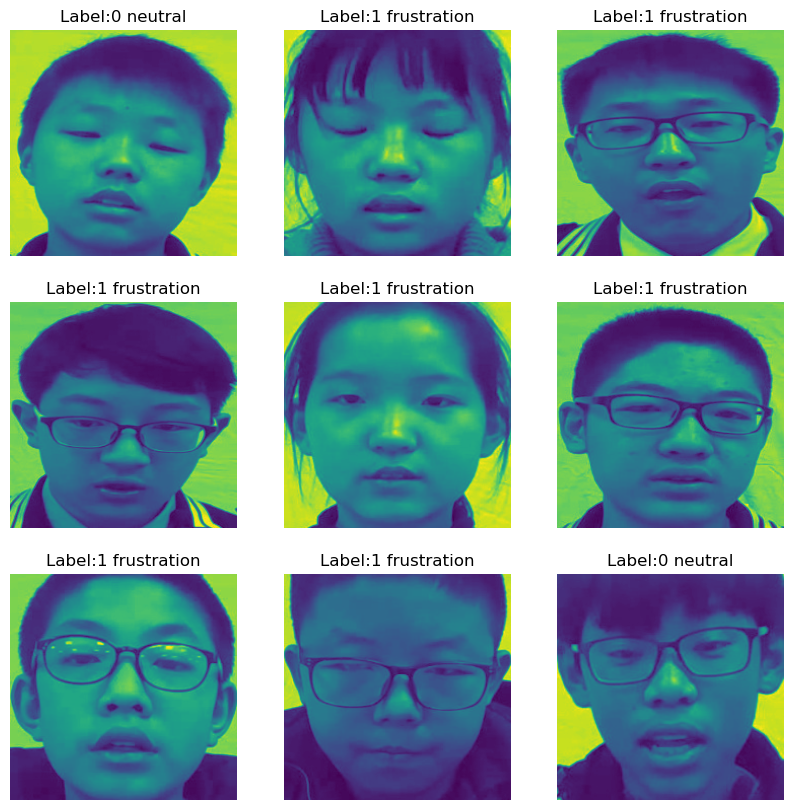

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(f'Label:{label_names[i]}')
    plt.axis('off')
plt.show()

In [8]:
validation_generator = validation_data_gen.flow_from_directory(
    'db_for_cnn_2/dev',
    target_size=(224,224),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

Found 39780 images belonging to 2 classes.


In [9]:
test_generator = test_data_gen.flow_from_directory(
    'db_for_cnn_2/test',
    target_size=(224,224),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

Found 39840 images belonging to 2 classes.


Indices para las clases de Train



In [9]:
# class_indices = train_generator.class_indices
# print('Train classes:', class_indices)

Train classes: {'0 neutral': 0, '1 frustration': 1}


Indices para las clases de Test



In [10]:
# class_indices = test_generator.class_indices
# print('Test classes:', class_indices)

Test classes: {'0 neutral': 0, '1 frustration': 1}


Indices para las clases de Validation


In [11]:
# class_indices = validation_generator.class_indices
# print('Val classes:', class_indices)

Val classes: {'0 neutral': 0, '1 frustration': 1}


In [12]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input, AveragePooling2D,Activation
from tensorflow.keras.optimizers import Adam


model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(2,activation="softmax"))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 16)      160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 average_pooling2d_2 (Averag  (None, 54, 54, 32)       0         
 ePooling2D)                                                     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 27, 27, 32)       0         
 2D)                                                             
                                                      

In [14]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [15]:
history = model.fit_generator( 
        train_generator, 
        steps_per_epoch=28709 // 64, 
        epochs=10, 
        validation_data=validation_generator, 
        validation_steps=7178 // 64)

Epoch 1/10


C:\Users\bl4ck\AppData\Local\Temp\ipykernel_31896\2726110189.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


448/448 [==============================] - 255s 568ms/step - loss: 0.6477 - accuracy: 0.6007 - val_loss: 0.5824 - val_accuracy: 0.6839
Epoch 2/10
448/448 [==============================] - 253s 565ms/step - loss: 0.4744 - accuracy: 0.7770 - val_loss: 0.3683 - val_accuracy: 0.8330
Epoch 3/10
448/448 [==============================] - 252s 563ms/step - loss: 0.3817 - accuracy: 0.8318 - val_loss: 0.3028 - val_accuracy: 0.8673
Epoch 4/10
448/448 [==============================] - 249s 555ms/step - loss: 0.3233 - accuracy: 0.8658 - val_loss: 0.2927 - val_accuracy: 0.8722
Epoch 5/10
448/448 [==============================] - 250s 557ms/step - loss: 0.3009 - accuracy: 0.8760 - val_loss: 0.2967 - val_accuracy: 0.8754
Epoch 6/10
448/448 [==============================] - 251s 561ms/step - loss: 0.2674 - accuracy: 0.8923 - val_loss: 0.2585 - val_accuracy: 0.8830
Epoch 7/10
448/448 [==============================] - 251s 560ms/step - loss: 0.2658 - accuracy: 0.8933 - val_loss: 0.2694 - val_accura

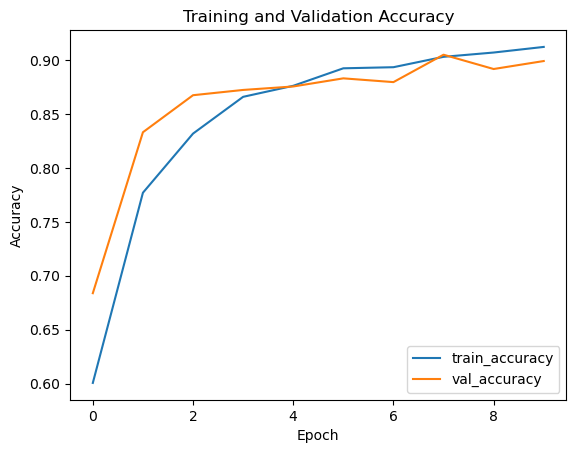

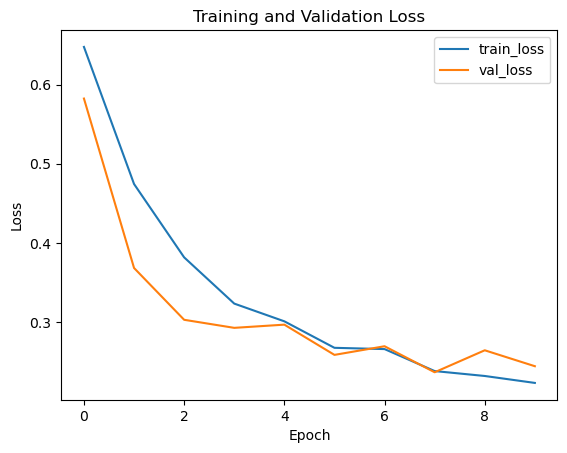

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
model.save('cnn-2.h5')

In [18]:
test_pred_path = 'db_for_cnn_2/test/1 frustration/11_6_3-12-23.jpg'
image = cv2.imread(test_pred_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
image_normalized = image / 255.0
image_batch = np.expand_dims(image_normalized, axis=0)

In [19]:
image_normalized.shape

(224, 224)

In [3]:
import tensorflow as tf

In [4]:
model = tf.keras.models.load_model('cnn-2.h5')

In [13]:
predicciones = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)


623/623 [==============================] - 225s 361ms/step


In [22]:
predicted_classes = np.argmax(predicciones, axis=-1)

In [23]:
# Mapear índices de clases a nombres de clases
class_indices = test_generator.class_indices
class_indices = {v: k for k, v in class_indices.items()}  # Invertir el diccionario

predicted_class_names = [class_indices[k] for k in predicted_classes]

In [24]:
evaluation = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
print(f'Loss: {evaluation[0]}')
print(f'Accuracy: {evaluation[1]}')

623/623 [==============================] - 76s 122ms/step - loss: 0.2668 - accuracy: 0.8916
Loss: 0.2668491303920746
Accuracy: 0.891566276550293


In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt



In [27]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

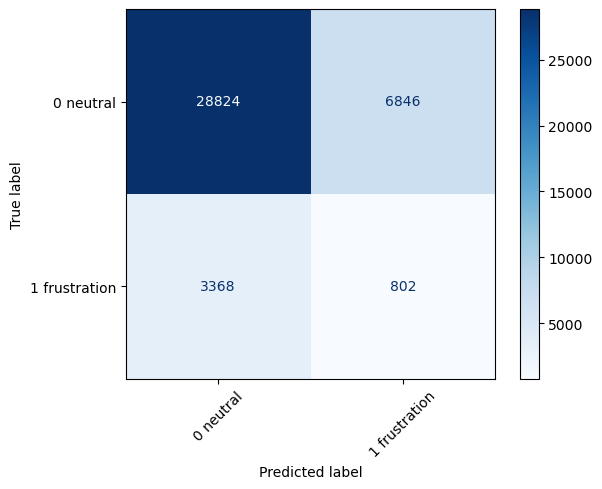

In [28]:
cm = confusion_matrix(true_classes, predicted_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()

In [30]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

               precision    recall  f1-score   support

    0 neutral       0.90      0.81      0.85     35670
1 frustration       0.10      0.19      0.14      4170

     accuracy                           0.74     39840
    macro avg       0.50      0.50      0.49     39840
 weighted avg       0.81      0.74      0.77     39840



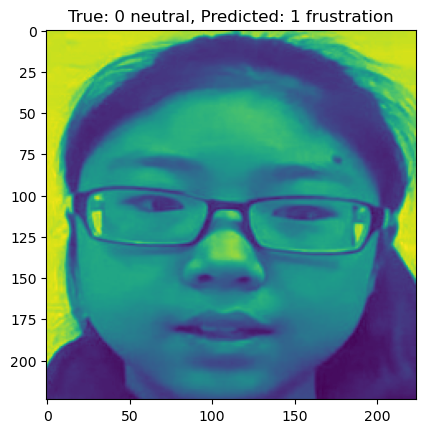

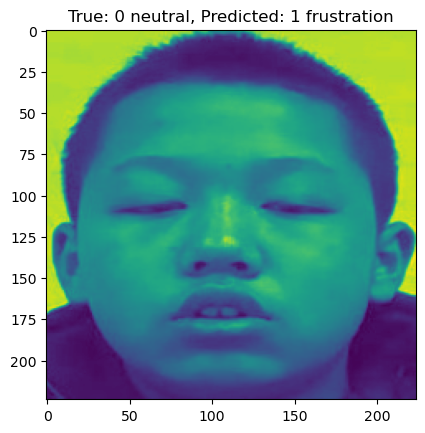

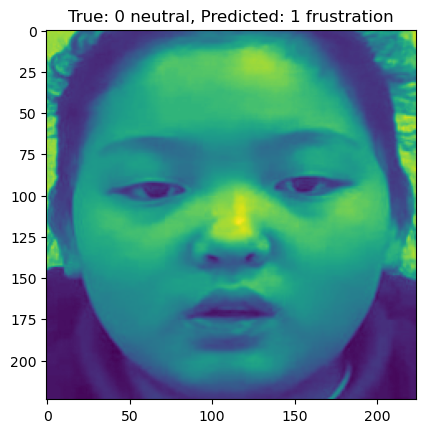

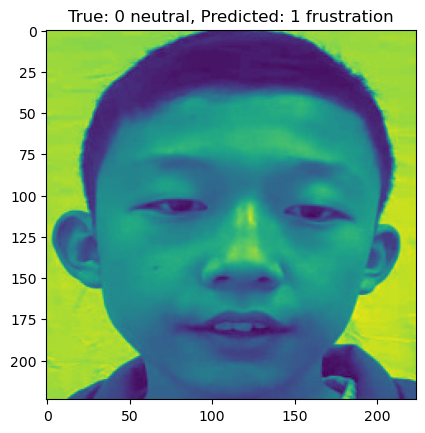

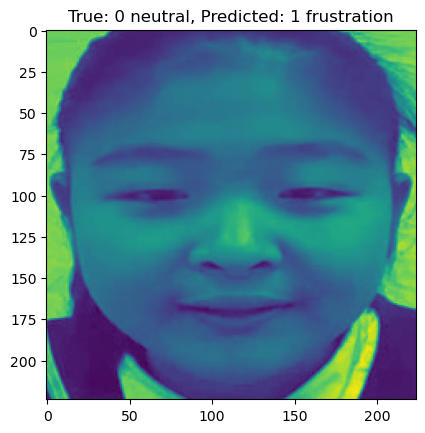

In [31]:
import matplotlib.pyplot as plt

# Obtener índices de las predicciones incorrectas
incorrect_indices = np.where(predicted_classes != true_classes)[0]

# Visualizar algunas de las imágenes mal clasificadas
for i, incorrect_index in enumerate(incorrect_indices[:5]):
    plt.figure()
    plt.imshow(test_generator[0][0][incorrect_index])
    plt.title(f"True: {class_labels[true_classes[incorrect_index]]}, Predicted: {class_labels[predicted_classes[incorrect_index]]}")
    plt.show()

In [39]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    'db_for_cnn_2/train',
    target_size=(224, 224),
    batch_size=32,
    color_mode="grayscale",
    class_mode='categorical'
)

Found 211500 images belonging to 2 classes.


In [41]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/5
6609/6609 [==============================] - 1851s 280ms/step - loss: 0.6621 - accuracy: 0.5940 - val_loss: 0.5719 - val_accuracy: 0.6561
Epoch 2/5
6609/6609 [==============================] - 1832s 277ms/step - loss: 0.6124 - accuracy: 0.6589 - val_loss: 0.5887 - val_accuracy: 0.6558
Epoch 3/5
6609/6609 [==============================] - 1856s 281ms/step - loss: 0.5763 - accuracy: 0.6941 - val_loss: 0.5973 - val_accuracy: 0.6699
Epoch 4/5
6609/6609 [==============================] - 1822s 276ms/step - loss: 0.5470 - accuracy: 0.7197 - val_loss: 0.5554 - val_accuracy: 0.7018
Epoch 5/5
6609/6609 [==============================] - 1803s 273ms/step - loss: 0.5261 - accuracy: 0.7363 - val_loss: 0.6128 - val_accuracy: 0.6798
